# Install & Importing required libraries

In [18]:
import os
os.getcwd()

'f:\\Emotion-based-Music-Recommendation-System-main\\Emotion-based-Music-Recommendation-System-main\\EMR'

In [19]:
#!pip install librosa==0.10.1 numpy soundfile==0.12.1 scikit-learn


In [20]:
#pip install --upgrade tensorflow keras


In [21]:

import soundfile # to read audio file
import numpy as np
import glob
import os
import pickle # to save model after training
from sklearn.model_selection import train_test_split # for splitting training and testing
from sklearn.neural_network import MLPClassifier # multi-layer perceptron model
from sklearn.metrics import accuracy_score # to measure how good we are
from sklearn.preprocessing import LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Input, Flatten, Dropout, Activation, Dense
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, LSTM
from keras.models import Model
from keras.layers import Input, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical


# Mount drive to fetch data (performed in Gcolab)

In [22]:
#from google.colab import drive
#drive.mount('/content/drive')
import keras
print(keras.__version__)

3.3.3


# Function to extract features from the audio dataset

In [23]:
def extract_feature(file_name, **kwargs):
    """
    Extract feature from audio file `file_name`
        Features supported:
            - MFCC (mfcc)
            - Chroma (chroma)
            - MEL Spectrogram Frequency (mel)
            - Contrast (contrast)
            - Tonnetz (tonnetz)
        e.g:
        `features = extract_feature(path, mel=True, mfcc=True)`
    """
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    contrast = kwargs.get("contrast")
    tonnetz = kwargs.get("tonnetz")
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        if X.ndim >= 2:
            X = np.mean(X, 1)
        sample_rate = sound_file.samplerate
        result = np.array([])
        if chroma or contrast:
            stft = np.abs(librosa.stft(X))
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result = np.hstack((result, mel))
    return result

Filter the required emotions - We opted to only 5 emotions for training

In [24]:
int2emotion = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}
AVAILABLE_EMOTIONS = {
    "neutral",
    "calm",
    "happy",
    "sad",
    "angry",
}

In [25]:
import librosa
import glob
def load_data(data_dir, test_size=0.2):
    X, y = [], []
    for file in glob.glob(data_dir):
        basename = os.path.basename(file)
        emotion = int2emotion.get(basename.split("-")[2])
        if emotion not in AVAILABLE_EMOTIONS:
            continue
        # extracting speech features
        features = extract_feature(file, mfcc=True, chroma=False, mel=False)
        if features is not None:
            X.append(features)
            y.append(emotion)
    
    if len(X) == 0 or len(y) == 0:
        raise ValueError("No data loaded. Check the data directory and loading logic.")

    return train_test_split(np.array(X), y, test_size=test_size, random_state=7)


# Function to load data and split the training and test data

In [26]:
data_dir = r"F:\Emotion-based-Music-Recommendation-System-main\Emotion-based-Music-Recommendation-System-main\EMR\audio_speech_actors_01-24\Actor_*/*.wav"

# Load data
X_train, X_test, y_train, y_test = load_data(data_dir, test_size=0.3)

print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

Training data shape: (604, 40)
Test data shape: (260, 40)


# Decision Tree Classifier
To make a first attempt in accomplishing this classification task we chose a decision tree just to get familiar with initial predictions before training with preferred CNN 

In [27]:
from sklearn.tree import DecisionTreeClassifier
# Initialize and train the model
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# Predict on test data
y_pred = dtree.predict(X_test)

# Example of how to check results
print("Model trained and predictions made.")

Model trained and predictions made.


In [29]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# Make predictions
predictions = dtree.predict(X_test)

# Print classification report using the correct variable names
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       angry       0.71      0.84      0.77        55
        calm       0.62      0.66      0.64        53
       happy       0.54      0.50      0.52        58
     neutral       0.38      0.44      0.41        25
         sad       0.52      0.42      0.46        69

    accuracy                           0.58       260
   macro avg       0.55      0.57      0.56       260
weighted avg       0.57      0.58      0.57       260



# Tailor the input dimension to fit the model

In [ ]:
# printing some imp details
print("[+] Number of training samples:", X_train.shape[0])
print("[+] Number of testing samples:", X_test.shape[0])
print("[+] Number of features:", X_train.shape[1])
# this is a vector of features extracted
lb = LabelEncoder()

y_train=np.array(y_train1)
y_test=np.array(y_test1)

y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

print(x_traincnn.shape)
print(x_testcnn.shape)
print(y_train.shape)
print(y_test.shape)

[+] Number of training samples: 579
[+] Number of testing samples: 249
[+] Number of features: 40
(579, 40, 1)
(249, 40, 1)
(579, 5)
(249, 5)


# Train the model

Model 1

In [ ]:
model = Sequential()

model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(40, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))
model.add(Conv1D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))
model.add(Conv1D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

cnnhistory = model.fit(x_traincnn, np.array(y_train), batch_size=267, epochs=730, validation_data=(x_testcnn, np.array(y_test)))
print("Accuracy: {:.2f}%".format(cnnhistory.history['accuracy'][-1] * 100))
print("Validation Accuracy: {:.2f}%".format(cnnhistory.history['val_accuracy'][-1] * 100))

C:\Users\RAMANA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/730
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step - accuracy: 0.2067 - loss: 14.8254 - val_accuracy: 0.1888 - val_loss: 3.5994
Epoch 2/730
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2076 - loss: 8.4497 - val_accuracy: 0.2570 - val_loss: 6.1088
Epoch 3/730
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2140 - loss: 8.0571 - val_accuracy: 0.1727 - val_loss: 3.6466
Epoch 4/730
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2214 - loss: 5.4850 - val_accuracy: 0.2129 - val_loss: 3.6996
Epoch 5/730
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2124 - loss: 5.4260 - val_accuracy: 0.2129 - val_loss: 2.3017
Epoch 6/730
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2127 - loss: 4.3027 - val_accuracy: 0.2450 - val_loss: 2.2215
Epoch 7/730
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2445 - loss: 3.8477 - val_accuracy: 0.2530 - val_loss: 2.8523
Epoch 8/730
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2016 - loss: 3.8520 - val_accuracy: 0.2410 - val_los

In [ ]:

#import keras
#import numpy as np
#import matplotlib.pyplot as plt
#import tensorflow as tf
#from keras.preprocessing import sequence
#from keras.models import Sequential
#from keras.layers import Dense, Embedding
#from keras.utils import to_categorical
#from keras.layers import Input, Flatten, Dropout, Activation
#from keras.layers import Conv1D, MaxPooling1D
#from keras.models import Model
#from keras.callbacks import ModelCheckpoint
#
#model = Sequential()
#
#model.add(Conv1D(64, 5,padding='same',
#                 input_shape=(40,1)))
#model.add(Activation('relu'))
#model.add(Dropout(0.1))
#model.add(MaxPooling1D(pool_size=(4)))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.1))
#model.add(MaxPooling1D(pool_size=(4)))
#model.add(Conv1D(256, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.1))
#model.add(Flatten())
#model.add(Dense(5))
#model.add(Activation('softmax'))
#opt = keras.optimizers.RMSprop(learning_rate=0.0001, rho=0.9, epsilon=1e-07, decay=0.0)
#model.compile(loss='sparse_categorical_crossentropy',
#              optimizer=opt,
#              metrics=['accuracy'])
#
#
#cnnhistory = model.fit(x_traincnn, np.array(y_train), batch_size=16, epochs=200, validation_data=(x_testcnn, np.array(y_test)))


In [ ]:
from keras.utils import to_categorical
predictions = model.predict(x_testcnn)
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes_onehot = to_categorical(predicted_classes, num_classes=5)



8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [ ]:
y_test
new_Ytest = y_test.astype(int)
new_Ytest

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0]])

In [ ]:
print(type(new_Ytest))
print(type(predicted_classes_onehot))
print(predicted_classes_onehot.shape)
print(new_Ytest.shape)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(249, 5)
(249, 5)


In [ ]:

from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predicted_classes_onehot)
print(report)
     

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        61
           1       0.89      0.95      0.92        43
           2       0.92      0.89      0.90        53
           3       0.97      1.00      0.98        28
           4       0.97      0.89      0.93        64

   micro avg       0.93      0.93      0.93       249
   macro avg       0.93      0.94      0.94       249
weighted avg       0.93      0.93      0.93       249
 samples avg       0.93      0.93      0.93       249



In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_Ytest.argmax(axis=1), predicted_classes_onehot.argmax(axis=1))
print(matrix)
# 0 = neutral, 1 = calm, 2 = happy, 3 = sad, 4 = angry, 
# we ignored 5 = fearful, 6 = disgust, 7 = surprised

[[59  0  0  0  2]
 [ 0 41  2  0  0]
 [ 2  4 47  0  0]
 [ 0  0  0 28  0]
 [ 3  1  2  1 57]]


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 40, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 20, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 20, 32)         │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 10, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 5, 64)          │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,313 (262.95 KB)

 Trainable params: 22,437 (87.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,876 (175.30 KB)

# Save the model

In [44]:
model_name = 'Emotion_Voice_Detection_Model1.h5'
model_path = os.path.join("D://Minor Proj//EMR", model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)


NameError: name 'model' is not defined

Save the model to a json file

In [ ]:
model_json = model.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
new_model=keras.models.load_model("F:\Emotion-based-Music-Recommendation-System-main\Emotion-based-Music-Recommendation-System-main\EMR\audio_speech_actors_01-24\Actor_*/*.wav\Emotion_Voice_Detection_Model1.h5")
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 40, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 20, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 20, 32)         │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 10, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 5, 64)          │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,439 (87.66 KB)

 Trainable params: 22,437 (87.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
loss, acc = new_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9422 - loss: 0.1873  
Restored model, accuracy: 93.17%


## Prediction

In [ ]:
import os

file_path = "F:\Emotion-based-Music-Recommendation-System-main\Emotion-based-Music-Recommendation-System-main\EMR\audio_speech_actors_01-24\Actor_*/*.wav""

if os.path.exists(file_path):
    print("File exists.")
else:
    print("File does not exist or path is incorrect.")


File exists.


In [ ]:
import librosa
data, sampling_rate = librosa.load("F:\Emotion-based-Music-Recommendation-System-main\Emotion-based-Music-Recommendation-System-main\EMR\audio_speech_actors_01-24\Actor_*/*.wav")

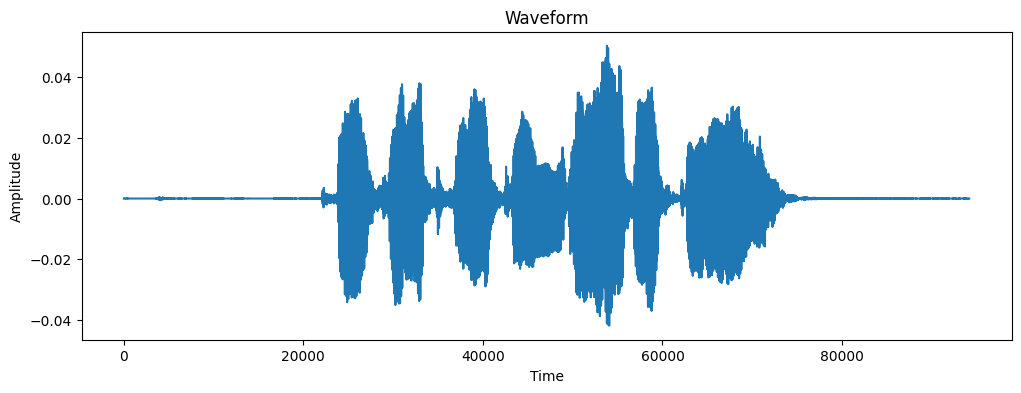

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(12, 4))
plt.plot(data)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()


Process the model for prediction

In [ ]:

import pandas as pd
feature_test=extract_feature("F:\Emotion-based-Music-Recommendation-System-main\Emotion-based-Music-Recommendation-System-main\EMR\audio_speech_actors_01-24\Actor_*/*.wav", mfcc=True, chroma=False, mel=False)
livedf2 = feature_test
livedf2= pd.DataFrame(data=livedf2)
livedf2 = livedf2.stack().to_frame().T

In [ ]:
livedf2

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-658.240173,93.19323,-17.716709,7.7726,7.442645,9.632843,-16.428867,-0.634282,-7.118395,-12.983199,...,-2.714149,-1.12312,-4.161562,-2.237675,-1.467562,-4.450527,-4.0478,-4.76752,-2.301375,-2.037424


In [ ]:
input_test= np.expand_dims(livedf2, axis=2)

In [ ]:
input_test.shape

(1, 40, 1)

Load model and run prediction

In [ ]:
from keras.models import model_from_json
json_file = open('model1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("F:\Emotion-based-Music-Recommendation-System-main\Emotion-based-Music-Recommendation-System-main\EMR\audio_speech_actors_01-24\Actor_*/*.wav"\Emotion_Voice_Detection_Model1.h5")
print("Loaded model from disk")

opt = keras.optimizers.RMSprop(learning_rate=0.0001, rho=0.9, epsilon=1e-07, decay=0.0)

loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))


preds = loaded_model.predict(input_test,
                         batch_size=267,
                         verbose=1)

Loaded model from disk


C:\Users\RAMANA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\optimizers\base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


compile_metrics: 93.17%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


In [ ]:



preds1=preds.argmax(axis=1)

abc = preds1.astype(int).flatten()
predictions = (lb.inverse_transform((abc)))

preddf = pd.DataFrame({'predictedvalues': predictions})

In [ ]:
preddf

,predictedvalues
0,neutral


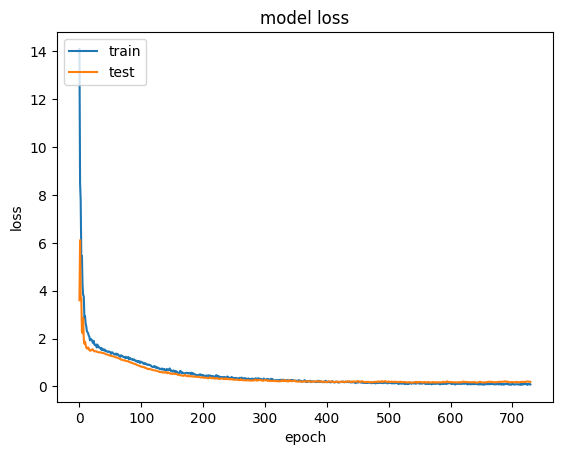

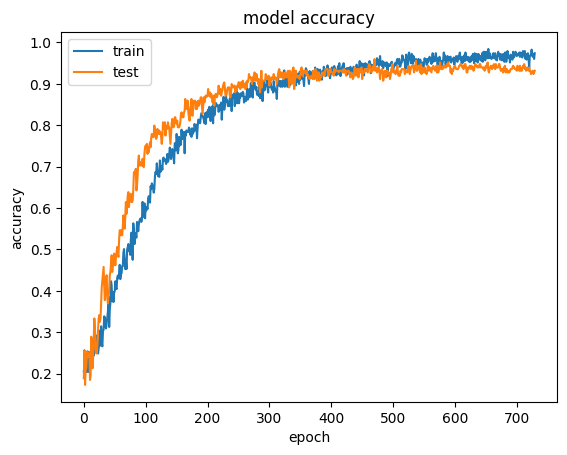

In [ ]:
import matplotlib.pyplot as plt

plt.plot(cnnhistory.history['loss'], label='train_loss')
plt.plot(cnnhistory.history['val_loss'], label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(cnnhistory.history['accuracy'], label='train_accuracy')
plt.plot(cnnhistory.history['val_accuracy'], label='val_accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
     